# Simple linear regression 

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression, using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Load the data

In [2]:
data = pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [3]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [4]:
X = data['size']
y = data['price']

### Explore the data

In [5]:
X.shape

(100,)

In [6]:
y.shape

(100,)

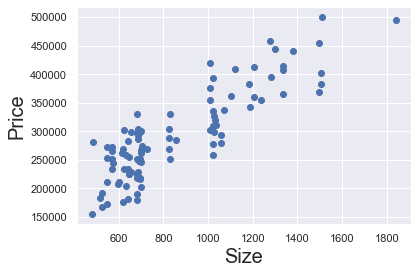

In [7]:
plt.scatter(X,y)
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

### Transform the inputs into a matrix (2D object)

In [8]:
X_matrix = X.values.reshape(-1,1)

### Regression itself

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate the R-squared

In [10]:
regressor.score(X_matrix, y)

0.7447391865847586

### Find the intercept

In [11]:
regressor.intercept_

101912.60180122912

### Find the coefficients

In [12]:
regressor.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [13]:
new_data = [[750]]
prediction = regressor.predict(new_data)

In [14]:
prediction

array([269296.65874718])

# Plotting graph

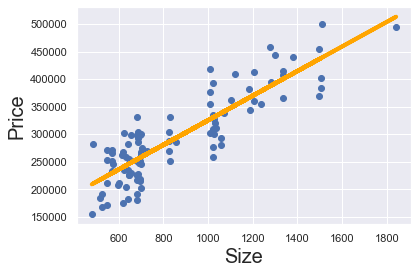

In [15]:
plt.scatter(X,y)
yhat = regressor.coef_ * X_matrix + regressor.intercept_
fit = plt.plot(X, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [16]:
new_data = pd.DataFrame(data=[600,750,800,850,900,1000, 1050], columns=['Size'])
new_data

,Size
0,600
1,750
2,800
3,850
4,900
5,1000
6,1050


In [17]:
yhat = regressor.predict(new_data)

In [18]:
new_data['Predicted Price'] = yhat
new_data

,Size,Predicted Price
0,600,235819.847358
1,750,269296.658747
2,800,280455.595877
3,850,291614.533007
4,900,302773.470136
5,1000,325091.344396
6,1050,336250.281526
